In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/opt.csv')

In [ ]:
print(df.head())


   rownames     PID Clinic Group  Age Black White Nat.Am Asian Hisp  ...  \
0         1  100034     NY     C   25   Yes   No     No    No        ...   
1         2  100042     NY     C   21   Yes   No     No    No        ...   
2         3  100067     NY     T   25   No    Yes    No    No   Yes  ...   
3         4  100083     NY     C   36   Yes   No     No    No        ...   
4         5  100091     NY     C   21   No    Yes    No    No   Yes  ...   

  BL..FN BL..S7 V5..AA V5..PG V5..TD  V5..TF V5..PI  V5..CR V5..FN  V5..S7  
0    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
1  22.15  33.02    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
2  12.51  23.31    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  

[5 rows x 172 columns]


In [ ]:
print(f"The dimensions of the dataframe are: {df.shape}")

The dimensions of the dataframe are: (823, 172)


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Columns: 172 entries, rownames to V5..S7
dtypes: float64(86), int64(13), object(73)
memory usage: 1.1+ MB
None


In [ ]:
# Calculate the percentage of missing values for each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

In [ ]:
# Create a DataFrame to display missing value information
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing Values'] > 0]
missing_info = missing_info.sort_values(by='Percentage', ascending=False)

In [ ]:
# Print columns with more than 50% missing values
print("Columns with more than 50% missing values:")
print(missing_info[missing_info['Percentage'] > 50])


Columns with more than 50% missing values:
              Missing Values  Percentage
BL.Drks.Day              810   98.420413
BL.Diab.Type             799   97.083840
BL.Cig.Day               731   88.821385
V5..CR                   498   60.510328
V5.DNA                   498   60.510328
V5.Univ                  498   60.510328
V5..PG                   498   60.510328
V5..AA                   498   60.510328
V5.CR                    498   60.510328
V5.PI                    498   60.510328
V5.TF                    498   60.510328
V5.TD                    498   60.510328
V5.PG                    498   60.510328
V5.AA                    498   60.510328
V5.FN                    498   60.510328
V5.S7                    498   60.510328
V5..TD                   498   60.510328
V5..TF                   498   60.510328
V5..PI                   498   60.510328
V5..S7                   498   60.510328
V5..FN                   498   60.510328
BL.PG                    430   52.247874
BL..TF        

In [ ]:
# Clean object type columns by stripping leading/trailing whitespace
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

In [ ]:
# Create a 'Race' column for easier analysis
def get_race(row):
    if row['Black'] == 'Yes':
        return 'Black'
    elif row['White'] == 'Yes':
        return 'White'
    elif row['Nat.Am'] == 'Yes':
        return 'Nat.Am'
    elif row['Asian'] == 'Yes':
        return 'Asian'
    elif row['Hisp'] == 'Yes':
        return 'Hisp'
    return 'Unknown'

In [ ]:
df['Race'] = df.apply(get_race, axis=1)


Text(0, 0.5, 'Count')

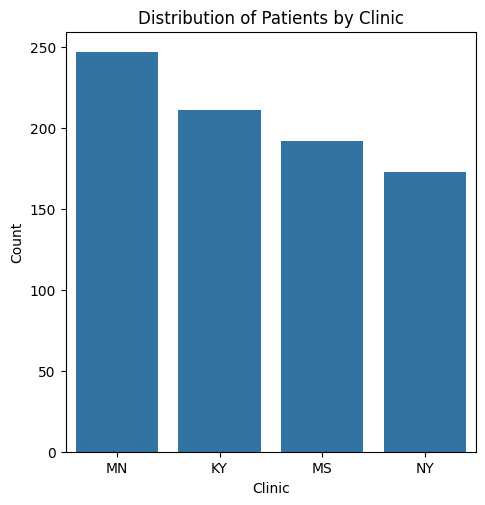

In [ ]:
plt.figure(figsize=(18, 12))

# Clinic
plt.subplot(2, 3, 1)
sns.countplot(x='Clinic', data=df, order=df['Clinic'].value_counts().index)
plt.title('Distribution of Patients by Clinic')
plt.xlabel('Clinic')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

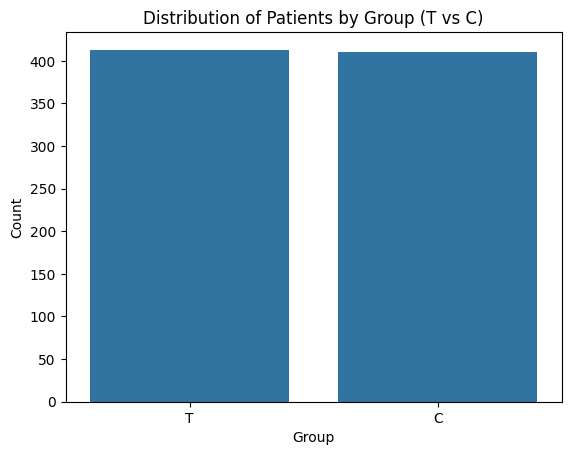

In [ ]:
sns.countplot(x='Group', data=df, order=df['Group'].value_counts().index)
plt.title('Distribution of Patients by Group (T vs C)')
plt.xlabel('Group')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

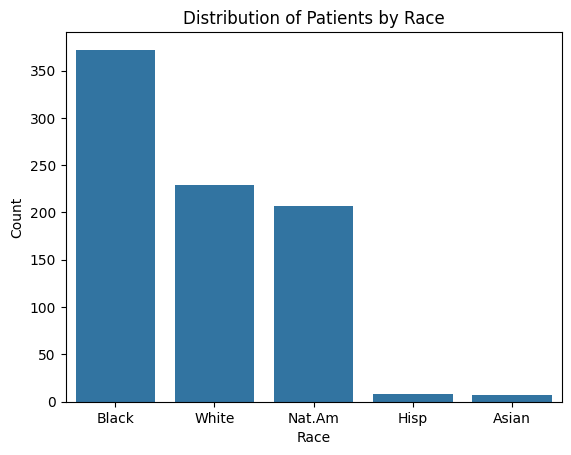

In [ ]:
sns.countplot(x='Race', data=df, order=df['Race'].value_counts().index)
plt.title('Distribution of Patients by Race')
plt.xlabel('Race')
plt.ylabel('Count')

Text(0, 0.5, 'Education')

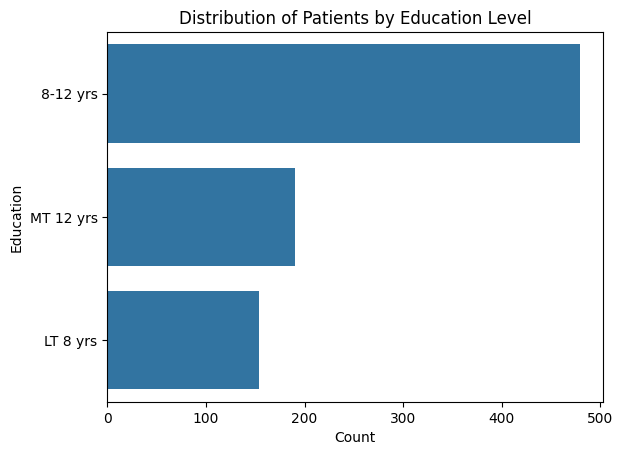

In [ ]:
sns.countplot(y='Education', data=df, order=df['Education'].value_counts().index)
plt.title('Distribution of Patients by Education Level')
plt.xlabel('Count')
plt.ylabel('Education')

Text(0, 0.5, 'Count')

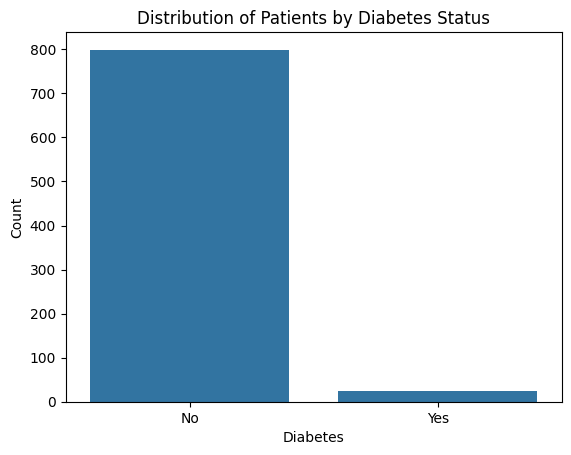

In [ ]:
sns.countplot(x='Diabetes', data=df, order=df['Diabetes'].value_counts().index)
plt.title('Distribution of Patients by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('Count')


Text(0, 0.5, 'Frequency')

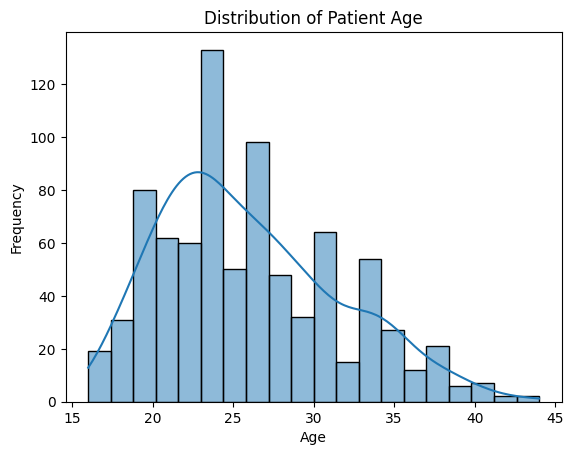

In [ ]:
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Age vs. BMI')

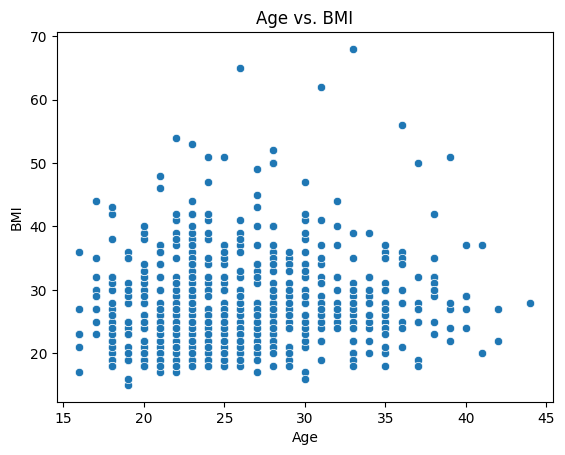

In [ ]:
sns.scatterplot(x='Age', y='BMI', data=df)
plt.title('Age vs. BMI')

Text(0.5, 1.0, 'Gestational Age at Outcome by Group')

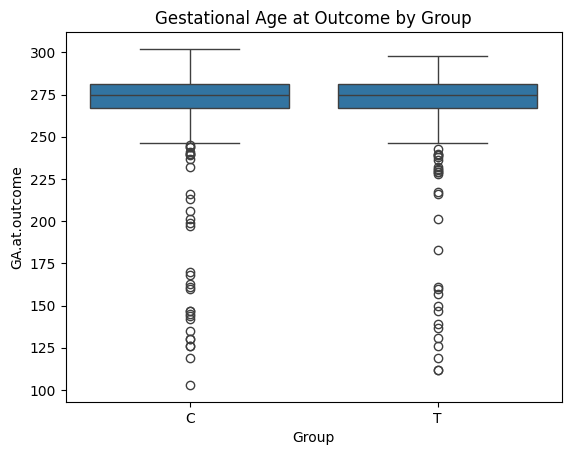

In [ ]:
sns.boxplot(x='Group', y='GA.at.outcome', data=df)
plt.title('Gestational Age at Outcome by Group')

Text(0.5, 1.0, 'Gestational Age at Outcome by Race')

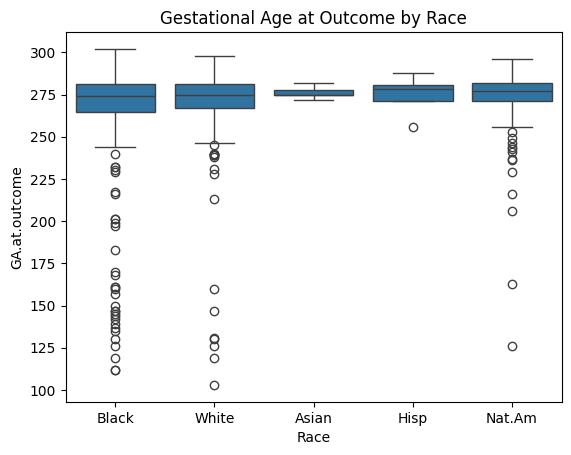

In [ ]:
sns.boxplot(x='Race', y='GA.at.outcome', data=df)
plt.title('Gestational Age at Outcome by Race')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

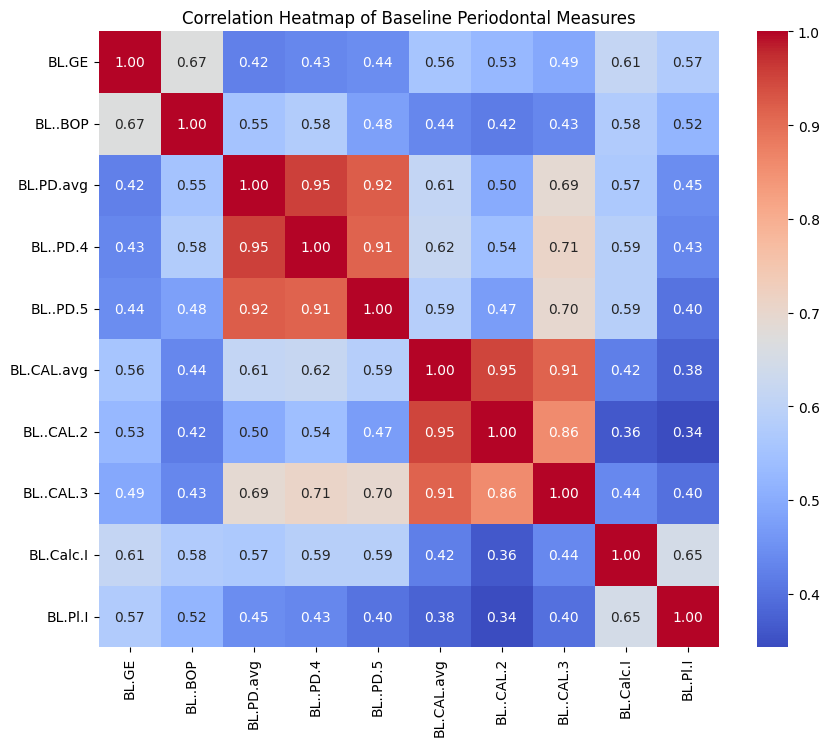

In [ ]:
#Multivariate Analysis
baseline_periodontal_cols = ['BL.GE', 'BL..BOP', 'BL.PD.avg', 'BL..PD.4', 'BL..PD.5', 'BL.CAL.avg', 'BL..CAL.2', 'BL..CAL.3', 'BL.Calc.I', 'BL.Pl.I']
corr_matrix = df[baseline_periodontal_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Baseline Periodontal Measures')
plt